# Importing Libraries and Dataset

In [214]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [215]:
df = pd.read_csv('credit_risk_dataset.csv')

In [216]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# EDA

In [217]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [219]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [220]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [221]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

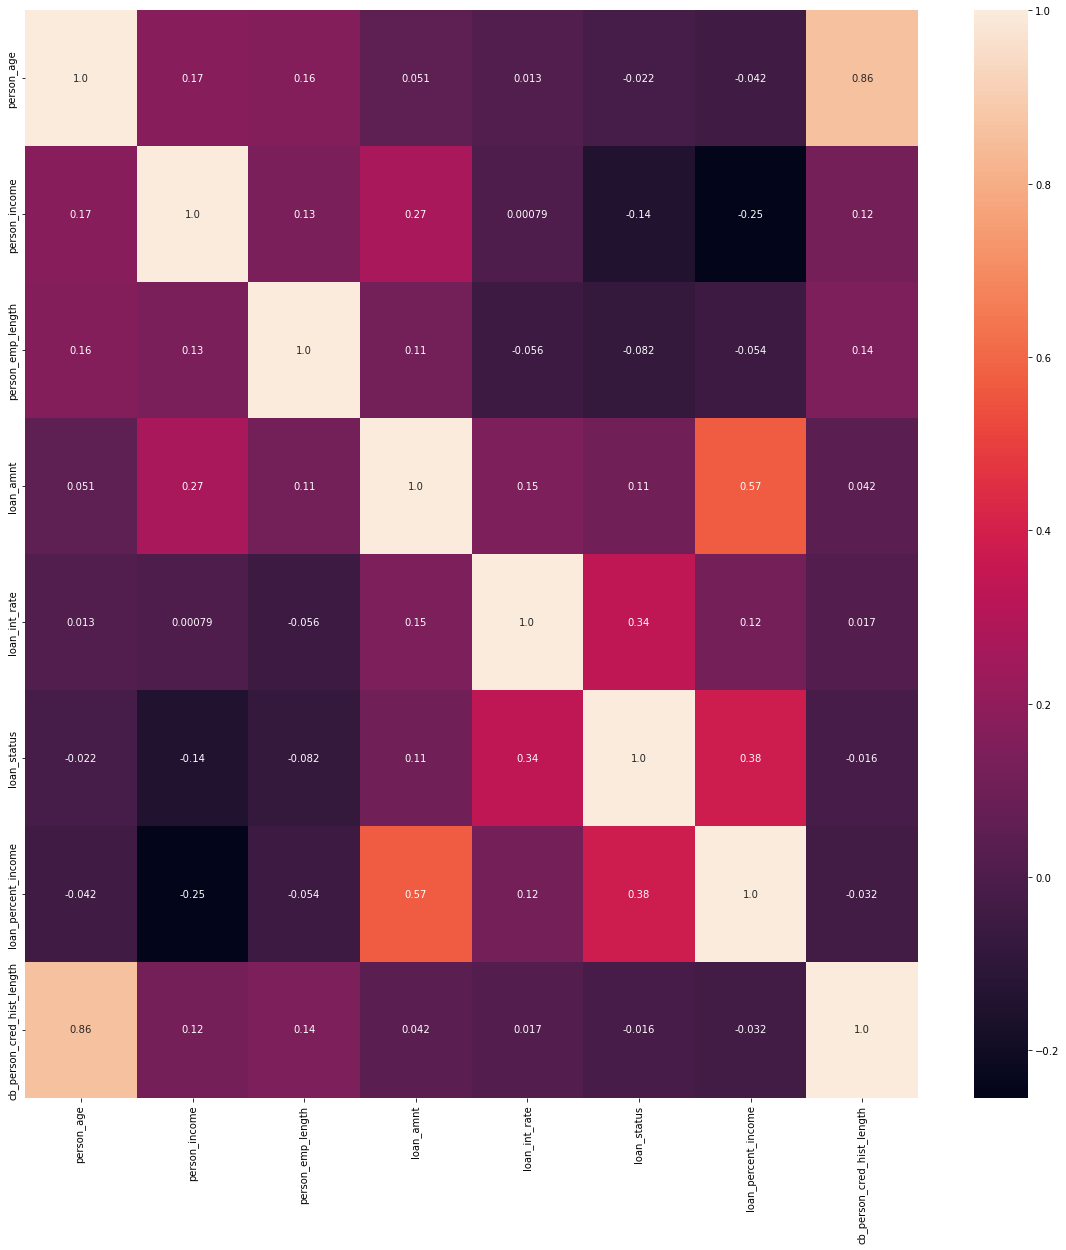

In [222]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")

## Countplot for Categorical Varibales

Text(0.5, 1.0, 'Loan Status')

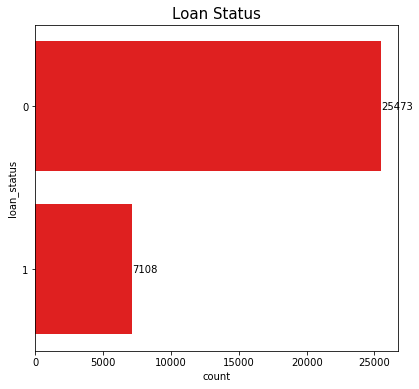

In [223]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_status, color = 'r')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_status'].value_counts())
ax1.set_title('Loan Status',fontsize = 15 )

Text(0.5, 1.0, 'Home Ownership')

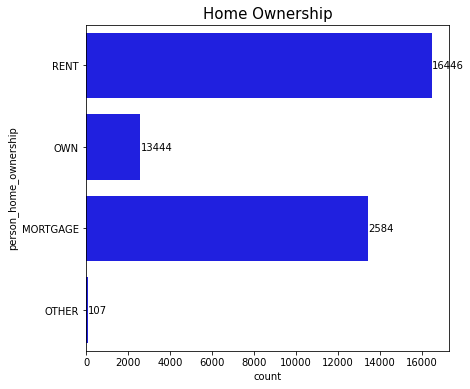

In [224]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.person_home_ownership, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['person_home_ownership'].value_counts())
ax1.set_title('Home Ownership',fontsize = 15 )

Text(0.5, 1.0, 'Loan Intent')

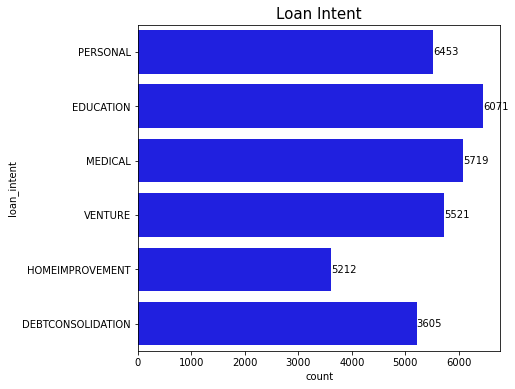

In [225]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_intent, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_intent'].value_counts())
ax1.set_title('Loan Intent',fontsize = 15 )

Text(0.5, 1.0, 'Loan Grade')

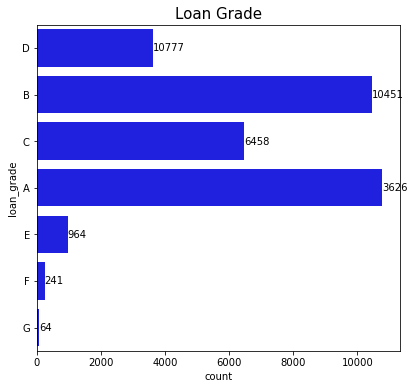

In [226]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.loan_grade, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['loan_grade'].value_counts())
ax1.set_title('Loan Grade',fontsize = 15 )

Text(0.5, 1.0, 'Historical Default')

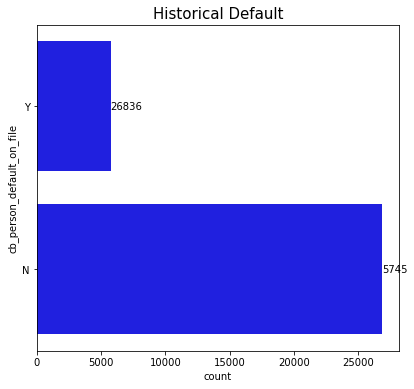

In [227]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.cb_person_default_on_file, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['cb_person_default_on_file'].value_counts())
ax1.set_title('Historical Default',fontsize = 15 )

## Boxplot for Numerical Variables

Text(0.5, 1.0, 'Age')

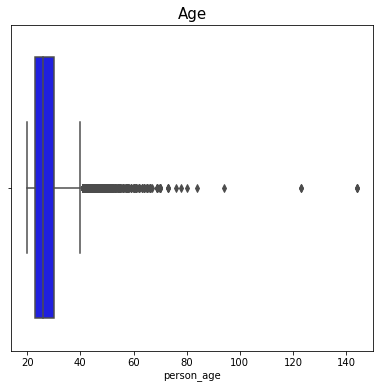

In [228]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_age, color = 'b')
ax1.set_title('Age',fontsize = 15 )

Text(0.5, 1.0, 'Annual Income')

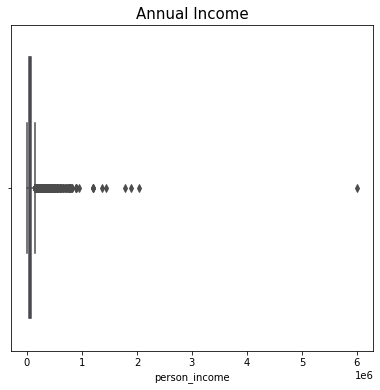

In [229]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_income, color = 'b')
ax1.set_title('Annual Income',fontsize = 15 )

Text(0.5, 1.0, 'Employment Length (in years)')

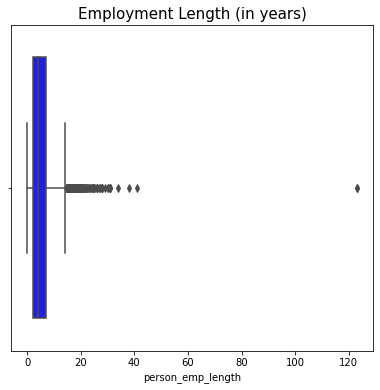

In [230]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.person_emp_length, color = 'b')
ax1.set_title('Employment Length (in years)',fontsize = 15 )

Text(0.5, 1.0, 'Loan Amount')

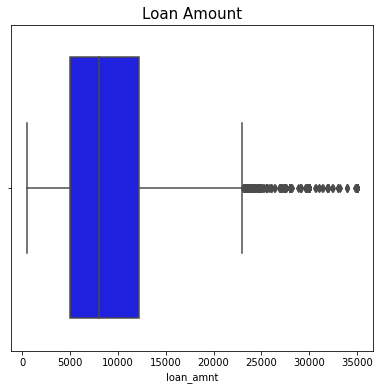

In [231]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_amnt, color = 'b')
ax1.set_title('Loan Amount',fontsize = 15 )

Text(0.5, 1.0, 'Interest Rate')

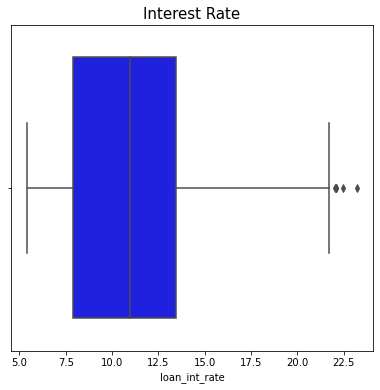

In [232]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_int_rate, color = 'b')
ax1.set_title('Interest Rate',fontsize = 15 )

Text(0.5, 1.0, 'Percent Income')

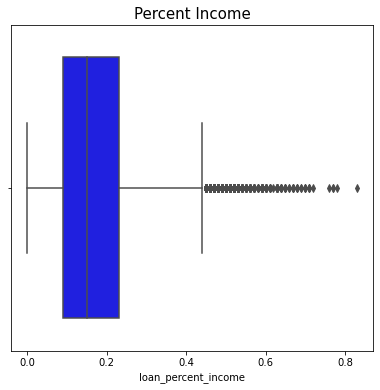

In [233]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.loan_percent_income, color = 'b')
ax1.set_title('Percent Income',fontsize = 15 )

Text(0.5, 1.0, 'Credit History Length')

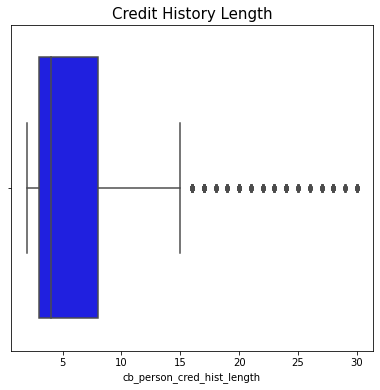

In [234]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.cb_person_cred_hist_length, color = 'b')
ax1.set_title('Credit History Length',fontsize = 15 )

# Pre-Processing

## Imputing Missing Values

In [235]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [236]:
# Calculating percentage of missing values
df.person_emp_length.isnull().sum()*100/ len(df.person_emp_length)

2.7469997851508547

In [237]:
# Calculating percentage of missing values
df.loan_int_rate.isnull().sum()*100/ len(df.person_emp_length)

9.563856235229121

In [238]:
# Dropping the null values of employment length
df.dropna(subset = ['person_emp_length'], inplace = True)

In [239]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [240]:
# Calculating percentage of missing values
df.loan_int_rate.isnull().sum()*100/ len(df.person_emp_length)

9.619390266994888

In [241]:
Impute = df.groupby('loan_intent')['loan_int_rate'].mean()
Impute

loan_intent
DEBTCONSOLIDATION    11.022421
EDUCATION            10.982582
HOMEIMPROVEMENT      11.225819
MEDICAL              11.079414
PERSONAL             11.020906
VENTURE              10.978850
Name: loan_int_rate, dtype: float64

In [242]:
# for i in range(31686):
#     if df['loan_intent'] == 'EDUCATION':
#         df.loc[i] =10.982582
#     elif df['loan_intent'] == 'MEDICAL':
#         df.loc[i] =11.079414 
#     elif df['loan_intent'] == 'VENTURE':
#         df.loc[i] =10.978850 
#     elif df['loan_intent'] == 'DEBTCONSOLIDATION':
#         df.loc[i] =11.022421 
#     elif df['loan_intent'] == 'HOMEIMPROVEMENT':
#         df.loc[i] =11.225819 
#     elif df['loan_intent'] == 'PERSONAL':
#         df.loc[i] =11.020906

In [243]:
#Replace the na values with the mean of the Interest rate
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

In [244]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


## Managing Extreme Outliers

In [246]:
index_age = df[df['person_age']>100].index
df.drop(index_age, inplace = True)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31681 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31681 non-null  int64  
 1   person_income               31681 non-null  int64  
 2   person_home_ownership       31681 non-null  object 
 3   person_emp_length           31681 non-null  float64
 4   loan_intent                 31681 non-null  object 
 5   loan_grade                  31681 non-null  object 
 6   loan_amnt                   31681 non-null  int64  
 7   loan_int_rate               31681 non-null  float64
 8   loan_status                 31681 non-null  int64  
 9   loan_percent_income         31681 non-null  float64
 10  cb_person_default_on_file   31681 non-null  object 
 11  cb_person_cred_hist_length  31681 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [248]:
index_age = df[df['person_emp_length']>100].index
df.drop(index_age, inplace = True)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31679 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31679 non-null  int64  
 1   person_income               31679 non-null  int64  
 2   person_home_ownership       31679 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 31679 non-null  object 
 5   loan_grade                  31679 non-null  object 
 6   loan_amnt                   31679 non-null  int64  
 7   loan_int_rate               31679 non-null  float64
 8   loan_status                 31679 non-null  int64  
 9   loan_percent_income         31679 non-null  float64
 10  cb_person_default_on_file   31679 non-null  object 
 11  cb_person_cred_hist_length  31679 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [250]:
index_age = df[df['person_income']>500000].index
df.drop(index_age, inplace = True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31628 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31628 non-null  int64  
 1   person_income               31628 non-null  int64  
 2   person_home_ownership       31628 non-null  object 
 3   person_emp_length           31628 non-null  float64
 4   loan_intent                 31628 non-null  object 
 5   loan_grade                  31628 non-null  object 
 6   loan_amnt                   31628 non-null  int64  
 7   loan_int_rate               31628 non-null  float64
 8   loan_status                 31628 non-null  int64  
 9   loan_percent_income         31628 non-null  float64
 10  cb_person_default_on_file   31628 non-null  object 
 11  cb_person_cred_hist_length  31628 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


# Encoding Categorical Variables

In [252]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [253]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [254]:
df = pd.concat([df[numerical],
                pd.get_dummies(df.person_home_ownership), 
                pd.get_dummies(df.loan_intent),
                pd.get_dummies(df.loan_grade),
                pd.get_dummies(df.cb_person_default_on_file)], axis=1)

In [255]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,...,VENTURE,A,B,C,D,E,F,G,N,Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


# Scaling Numerical Variables

In [256]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,...,VENTURE,A,B,C,D,E,F,G,N,Y
count,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,...,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000
mean,27.711901,65271.727204,4.778013,9655.031934,11.039836,0.215600,0.169855,5.797331,0.412957,0.003320,...,0.175383,0.327368,0.321361,0.199475,0.112242,0.030068,0.007462,0.002024,0.822404,0.177596
std,6.191255,40925.472381,4.031300,6328.769604,3.070966,0.411245,0.106178,4.045747,0.492373,0.057523,...,0.380300,0.469260,0.467006,0.399612,0.315669,0.170778,0.086060,0.044939,0.382178,0.382178
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,39234.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,55783.000000,4.000000,8000.000000,11.039867,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,94.000000,500000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
cols = df.columns

In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [259]:
df = pd.DataFrame(df, columns=[cols])

In [260]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,...,VENTURE,A,B,C,D,E,F,G,N,Y
count,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,...,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000,31628.000000
mean,0.104215,0.123532,0.116537,0.265363,0.315721,0.215600,0.194945,0.135619,0.412957,0.003320,...,0.175383,0.327368,0.321361,0.199475,0.112242,0.030068,0.007462,0.002024,0.822404,0.177596
std,0.083666,0.082511,0.098324,0.183443,0.172526,0.411245,0.129485,0.144491,0.492373,0.057523,...,0.380300,0.469260,0.467006,0.399612,0.315669,0.170778,0.086060,0.044939,0.382178,0.382178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040541,0.071036,0.048780,0.130435,0.172472,0.000000,0.097561,0.035714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.081081,0.104401,0.097561,0.217391,0.315723,0.000000,0.170732,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.135135,0.153226,0.170732,0.347826,0.434831,0.000000,0.268293,0.214286,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-Test Split

In [262]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
X = df.drop('loan_status',axis=1)
y = df[['loan_status']]

In [277]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['loan_status'])

In [278]:
X_train = train.drop(["loan_status"], axis=1)
y_train = train["loan_status"]
X_test = test.drop(["loan_status"], axis=1) 
y_test = test["loan_status"]

print(X_train.shape)
print(X_test.shape)

(25302, 26)
(6326, 26)


In [270]:
print(y_train.shape)
print(y_test.shape)

(25302, 1)
(6326, 1)


In [274]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## KNN Classifier

In [284]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'Accuracy score for {i} KNN is: {accuracy_score(y_test, y_pred)}')

Accuracy score for 1 KNN is: 0.8653177363262725
Accuracy score for 2 KNN is: 0.8893455580145432
Accuracy score for 3 KNN is: 0.8921909579513121
Accuracy score for 4 KNN is: 0.8950363578880809
Accuracy score for 5 KNN is: 0.8996206133417641
Accuracy score for 6 KNN is: 0.8988302244704395
Accuracy score for 7 KNN is: 0.9013594688586785
Accuracy score for 8 KNN is: 0.8983559911476446
Accuracy score for 9 KNN is: 0.8994625355674992
Accuracy score for 10 KNN is: 0.8986721466961746
Accuracy score for 11 KNN is: 0.9007271577616187
Accuracy score for 12 KNN is: 0.8985140689219095
Accuracy score for 13 KNN is: 0.9004110022130888
Accuracy score for 14 KNN is: 0.8967752134049952
Accuracy score for 15 KNN is: 0.8978817578248498
Accuracy score for 16 KNN is: 0.8950363578880809
Accuracy score for 17 KNN is: 0.8970913689535251
Accuracy score for 18 KNN is: 0.894878280113816
Accuracy score for 19 KNN is: 0.897407524502055
Accuracy score for 20 KNN is: 0.8945621245652862
Accuracy score for 21 KNN is: 0

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

ValueError: Unable to coerce to Series, length must be 1: given 6326

In [ ]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## K value hyperparameter tuning with 10-fold cross validation

In [ ]:
for i in range(2,21): 
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    print('{}KNN  Average cross_validation score:{}'.format(i,scores.mean()))

In [ ]:
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
# error_rate.append(np.mean(pred_i != y_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
#displaying confusion matrix

import matplotlib.pyplot as plt

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred, average="micro"))
print("Recall:: ", recall_score(y_test, y_pred, average="micro"))
#print("F1_Score:: ", f1_score_rep(y_test, y_pred, average="micro"))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
DT_model.fit(X_train,y_train)

In [ ]:
y_pred = DT_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred, average="micro"))
print("Recall:: ", recall_score(y_test, y_pred, average="micro"))
print("F1_Score:: ", f1_score_rep(y_test, y_pred, average="micro"))

In [ ]:
df

In [ ]:
target = list(df['insuranceclaim'].unique())
feature_names = list(X.columns)

In [ ]:
from sklearn.tree import export_text
r = export_text(DT_model, feature_names=feature_names)
print(r)

## Random Forest